In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

import os
import time
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error

import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

import scipy.stats as stats

import seaborn as sns

from datetime import datetime

import re

from tqdm.notebook import tqdm

import dask.dataframe as dd
from dask.distributed import Client

sys.path.insert(0, 'tools/')

from tools import * 

## Temperatura

In [2]:
df_temperature_mes = pd.read_csv('./Altres_dades/1780_TemperaturesMitjanesMensualsAire/temperaturesbarcelonadesde1780_format_long.csv',sep=',')


In [3]:
df_temperature_mes.drop('Desc_Mes', axis=1, inplace=True)

In [4]:
years = df_temperature_mes.Any.unique()
months = df_temperature_mes.Mes.unique()


In [5]:
years

array([1780, 1781, 1782, 1783, 1784, 1785, 1786, 1787, 1788, 1789, 1790,
       1791, 1792, 1793, 1794, 1795, 1796, 1797, 1798, 1799, 1800, 1801,
       1802, 1803, 1804, 1805, 1806, 1807, 1808, 1809, 1810, 1811, 1812,
       1813, 1814, 1815, 1816, 1817, 1818, 1819, 1820, 1821, 1822, 1823,
       1824, 1825, 1826, 1827, 1828, 1829, 1830, 1831, 1832, 1833, 1834,
       1835, 1836, 1837, 1838, 1839, 1840, 1841, 1842, 1843, 1844, 1845,
       1846, 1847, 1848, 1849, 1850, 1851, 1852, 1853, 1854, 1855, 1856,
       1857, 1858, 1859, 1860, 1861, 1862, 1863, 1864, 1865, 1866, 1867,
       1868, 1869, 1870, 1871, 1872, 1873, 1874, 1875, 1876, 1877, 1878,
       1879, 1880, 1881, 1882, 1883, 1884, 1885, 1886, 1887, 1888, 1889,
       1890, 1891, 1892, 1893, 1894, 1895, 1896, 1897, 1898, 1899, 1900,
       1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910, 1911,
       1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922,
       1923, 1924, 1925, 1926, 1927, 1928, 1929, 19

In [6]:
months

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [7]:
df_temperature_mes

,Any,Mes,Temperatura
0,1780,1,6.7
1,1780,2,7.3
2,1780,3,11.6
3,1780,4,11.4
4,1780,5,16.3
...,...,...,...
2911,2022,8,27.2
2912,2022,9,22.5
2913,2022,10,20.7
2914,2022,11,15.2


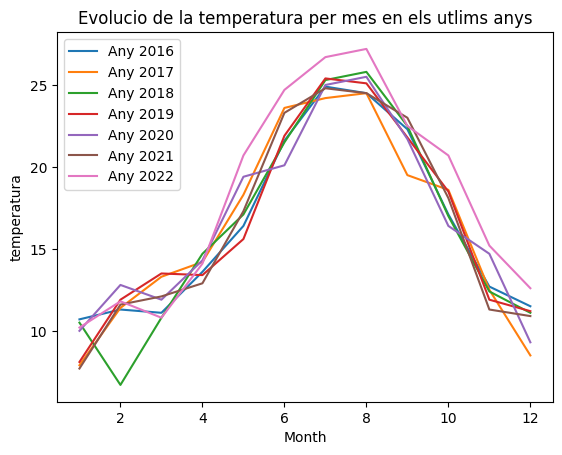

In [8]:
for year in years[-7:]:
    year_df = df_temperature_mes[df_temperature_mes.Any.isin([year])]
    plt.plot(year_df.Mes, year_df.Temperatura, label=f'Any {year}')

# Ejes y leyenda
plt.xlabel('Month')
plt.ylabel('temperatura')
plt.title('Evolucio de la temperatura per mes en els utlims anys')

plt.legend()
plt.show()  

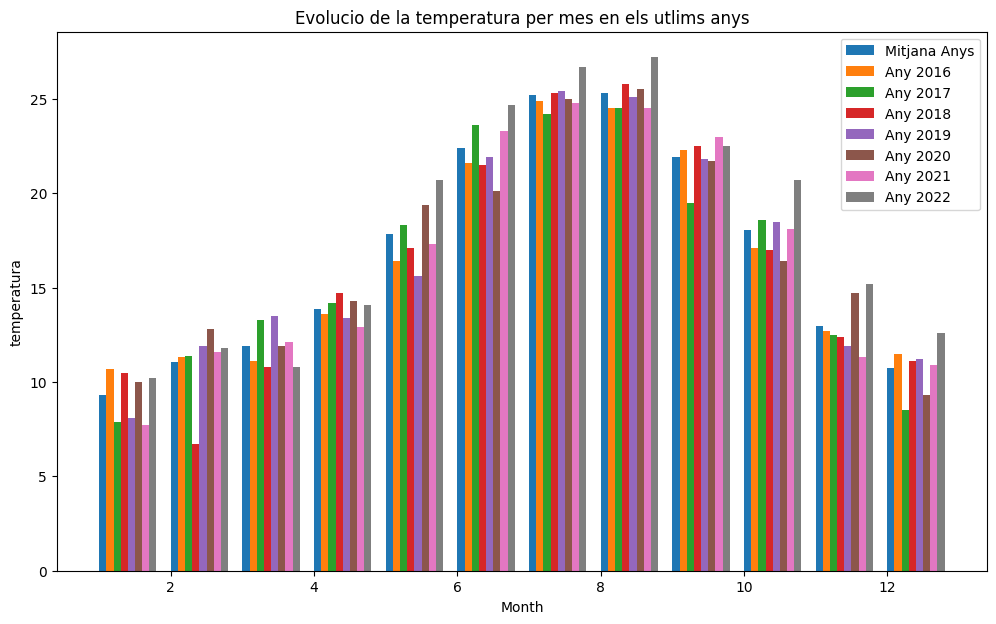

In [9]:
plt.figure(figsize=(12,7))

take_years = years[-7:]

last_years = df_temperature_mes[df_temperature_mes.Any.isin(take_years)]

mean_temp_last_years = last_years.drop(['Any'], axis=1).groupby(['Mes']).Temperatura.mean()

plt.bar(
    mean_temp_last_years.index,
    mean_temp_last_years.values,
    align='edge',
    label=f'Mitjana Anys',
    width=0.1
)

for index, year in enumerate(take_years):
    year_df = df_temperature_mes[df_temperature_mes.Any.isin([year])]
    plt.bar(
        x=year_df.Mes+(0.1*(index+1)),
        height=year_df.Temperatura,
        align='edge',
        label=f'Any {year}',
        width=0.1
    )
    
# Ejes y leyenda
plt.xlabel('Month')
plt.ylabel('temperatura')
plt.title('Evolucio de la temperatura per mes en els utlims anys')

plt.legend()
plt.show()  

# Precipitacions

In [10]:
df_precipitacions_mes = pd.read_csv('./Altres_dades/1786_PrecipitacionsAcumuladesMensuals/precipitacionsbarcelonadesde1786_format_long.csv',sep=',')


In [11]:
df_precipitacions_mes.drop('Desc_Mes', axis=1, inplace=True)

In [12]:
years = df_precipitacions_mes.Any.unique()
months = df_precipitacions_mes.Mes.unique()


In [13]:
years

array([1786, 1787, 1788, 1789, 1790, 1791, 1792, 1793, 1794, 1795, 1796,
       1797, 1798, 1799, 1800, 1801, 1802, 1803, 1804, 1805, 1806, 1807,
       1808, 1809, 1810, 1811, 1812, 1813, 1814, 1815, 1816, 1817, 1818,
       1819, 1820, 1821, 1822, 1823, 1824, 1825, 1826, 1827, 1828, 1829,
       1830, 1831, 1832, 1833, 1834, 1835, 1836, 1837, 1838, 1839, 1840,
       1841, 1842, 1843, 1844, 1845, 1846, 1847, 1848, 1849, 1850, 1851,
       1852, 1853, 1854, 1855, 1856, 1857, 1858, 1859, 1860, 1861, 1862,
       1863, 1864, 1865, 1866, 1867, 1868, 1869, 1870, 1871, 1872, 1873,
       1874, 1875, 1876, 1877, 1878, 1879, 1880, 1881, 1882, 1883, 1884,
       1885, 1886, 1887, 1888, 1889, 1890, 1891, 1892, 1893, 1894, 1895,
       1896, 1897, 1898, 1899, 1900, 1901, 1902, 1903, 1904, 1905, 1906,
       1907, 1908, 1909, 1910, 1911, 1912, 1913, 1914, 1915, 1916, 1917,
       1918, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928,
       1929, 1930, 1931, 1932, 1933, 1934, 1935, 19

In [14]:
months

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [15]:
df_precipitacions_mes

,Any,Mes,Precipitacions
0,1786,1,32.8
1,1786,2,28.4
2,1786,3,84.4
3,1786,4,42.3
4,1786,5,8.5
...,...,...,...
2839,2022,8,67.9
2840,2022,9,13.1
2841,2022,10,11.3
2842,2022,11,7.6


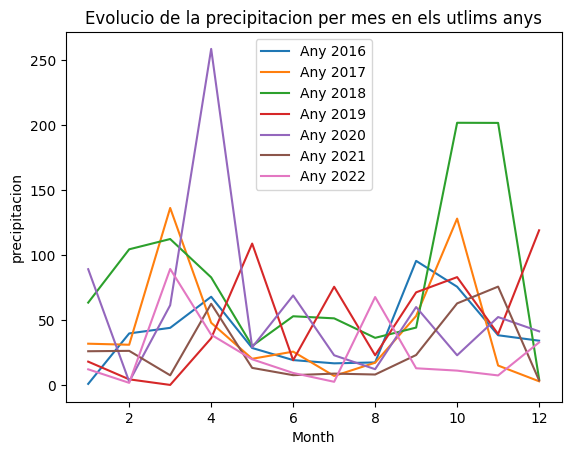

In [16]:
for year in years[-7:]:
    year_df = df_precipitacions_mes[df_precipitacions_mes.Any.isin([year])]
    plt.plot(year_df.Mes, year_df.Precipitacions, label=f'Any {year}')

# Ejes y leyenda
plt.xlabel('Month')
plt.ylabel('precipitacion')
plt.title('Evolucio de la precipitacion per mes en els utlims anys')

plt.legend()
plt.show()  

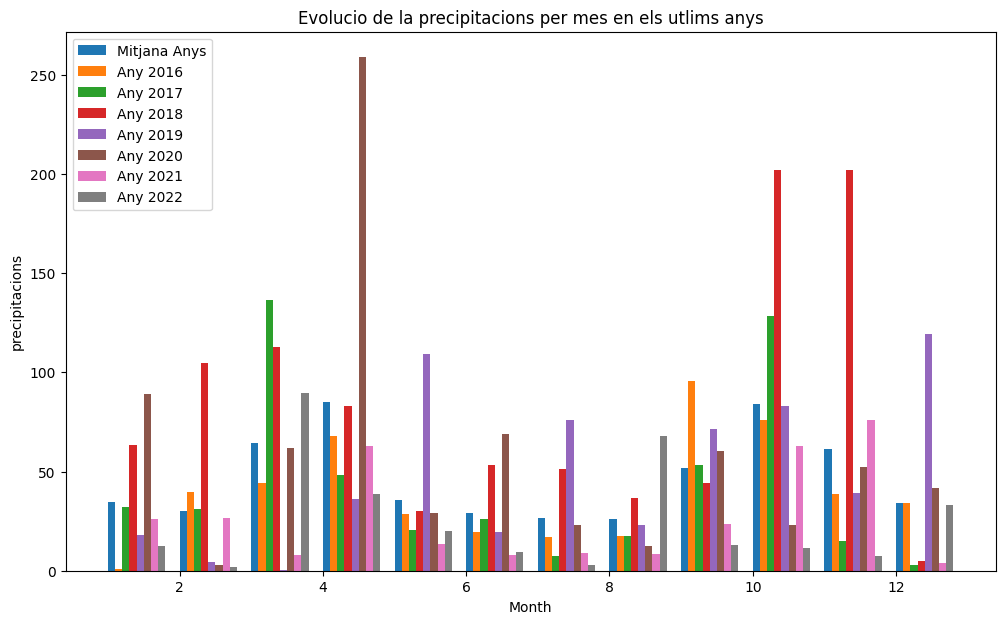

In [17]:
plt.figure(figsize=(12,7))

take_years = years[-7:]

last_years = df_precipitacions_mes[df_precipitacions_mes.Any.isin(take_years)]

mean_prec_last_years = last_years.drop(['Any'], axis=1).groupby(['Mes']).Precipitacions.mean()

plt.bar(
    mean_prec_last_years.index,
    mean_prec_last_years.values,
    align='edge',
    label=f'Mitjana Anys',
    width=0.1
)

for index, year in enumerate(take_years):
    year_df = df_precipitacions_mes[df_precipitacions_mes.Any.isin([year])]
    plt.bar(
        x=year_df.Mes+(0.1*(index+1)),
        height=year_df.Precipitacions,
        align='edge',
        label=f'Any {year}',
        width=0.1
    )
    
# Ejes y leyenda
plt.xlabel('Month')
plt.ylabel('precipitacions')
plt.title('Evolucio de la precipitacions per mes en els utlims anys')

plt.legend()
plt.show()  

# Continuacion Meteo

In [320]:
df_meteo_metadata = pd.read_csv('./Altres_dades/MetadataMeteo/MeteoCat_Metadades.csv',sep=',')

In [321]:
df_meteo_metadata

,CODI_VARIABLE,NOM_VARIABLE,UNITAT,ACRÒNIM
0,1000,Temperatura mitjana diària,°C,TM
1,1001,Temperatura màxima diària + hora,°C,TX
2,1002,Temperatura mínima diària + hora,°C,TN
3,1100,Humitat relativa mitjana diària,%,HRM
4,1101,Humitat relativa màxima diària + data,%,HRX
5,1102,Humitat relativa mínima diària + data,%,HRN
6,1200,Pressió atmosfèrica mitjana diària,hPa,PM
7,1201,Pressió atmosfèrica màxima diària + hora,hPa,PX
8,1202,Pressió atmosfèrica mínima diària + hora,hPa,PN
9,1300,Precipitació acumulada diària,mm,PPT


In [322]:
df_estadistica_meteo_19_d5 = pd.read_csv('./Altres_dades/EstadísticsEstacionsMeteo/2019_d5_observatori_fabra.csv',sep=',')
df_estadistica_meteo_19_x2 = pd.read_csv('./Altres_dades/EstadísticsEstacionsMeteo/2019_x2_barcelona_zoo.csv',sep=',')
df_estadistica_meteo_19_x4 = pd.read_csv('./Altres_dades/EstadísticsEstacionsMeteo/2019_x4_barcelona_el_raval.csv',sep=',')
df_estadistica_meteo_19_x8 = pd.read_csv('./Altres_dades/EstadísticsEstacionsMeteo/2019_x8_barcelona_zona_universitaria.csv',sep=',')

In [323]:
def convert_columns(data):
    print(data.shape)
    
    data.rename(
        columns={
            'PPT24H':'PPT',
            'DVX10':'DVVX10',
            'RS24H':'RS24h',
            'HPA':'PM'
        },
        inplace=True
    )
    
    for acro in df_meteo_metadata['ACRÒNIM'].values:
        if acro not in data.columns.values:
            data[acro] = np.nan
    
    code = data.CODI_ESTACIO.unique().tolist().pop()
    
    data.drop('CODI_ESTACIO', axis=1, inplace=True)

    data = data.set_index('DATA_LECTURA')

    data.columns = [f'VALOR_{col}_{code}' for col in data.columns.values]

    data = data.reset_index()

    data['DATA_LECTURA'] = pd.to_datetime(data['DATA_LECTURA'], format='%d/%m/%Y')
#     data['year'] = data['DATA_LECTURA'].dt.year
    
    print(data.shape)
    
    return data

In [324]:
df_estadistica_meteo_19_d5 = convert_columns(df_estadistica_meteo_19_d5)

(8766, 13)
(8766, 16)


In [325]:
df_estadistica_meteo_19_x2 = convert_columns(df_estadistica_meteo_19_x2)

(4832, 6)
(4832, 16)


In [326]:
df_estadistica_meteo_19_x4 = convert_columns(df_estadistica_meteo_19_x4)

(4809, 13)
(4809, 16)


In [327]:
df_estadistica_meteo_19_x8 = convert_columns(df_estadistica_meteo_19_x8)

(4262, 13)
(4262, 16)


In [329]:
df_estadistica_meteo_19 = pd.merge(
    pd.merge(
        df_estadistica_meteo_19_d5, df_estadistica_meteo_19_x2, 
        on='DATA_LECTURA',
        how='outer',
    ),
    pd.merge(
        df_estadistica_meteo_19_x4, df_estadistica_meteo_19_x8, 
        on='DATA_LECTURA',
        how='outer',
    ), 
    on='DATA_LECTURA',
    how='outer',
)


In [330]:
df_estadistica_meteo_19['year'] = df_estadistica_meteo_19['DATA_LECTURA'].dt.year

In [331]:
df_estadistica_meteo_19 = df_estadistica_meteo_19[df_estadistica_meteo_19.year.isin([2019])]

In [336]:
df_estadistica_meteo_20 = pd.read_csv('./Altres_dades/EstadísticsEstacionsMeteo/2020_MeteoCat_Detall_Estacions.csv',sep=',')
df_estadistica_meteo_21 = pd.read_csv('./Altres_dades/EstadísticsEstacionsMeteo/2021_MeteoCat_Detall_Estacions.csv',sep=',')
df_estadistica_meteo_22 = pd.read_csv('./Altres_dades/EstadísticsEstacionsMeteo/2022_MeteoCat_Detall_Estacions.csv',sep=',')
df_estadistica_meteo_23 = pd.read_csv('./Altres_dades/EstadísticsEstacionsMeteo/2023_MeteoCat_Detall_Estacions.csv',sep=',')


In [337]:
%%time 

df_estadistica_meteo_20.drop('DATA_EXTREM', axis=1, inplace=True)
print(df_estadistica_meteo_20.shape)

df_estadistica_meteo_21.drop('DATA_EXTREM', axis=1, inplace=True)
print(df_estadistica_meteo_21.shape)

df_estadistica_meteo_22.drop('DATA_EXTREM', axis=1, inplace=True)
print(df_estadistica_meteo_22.shape)

df_estadistica_meteo_23.drop('DATA_EXTREM', axis=1, inplace=True)
print(df_estadistica_meteo_23.shape)

df_20_21_22_23 = pd.concat([df_estadistica_meteo_20, df_estadistica_meteo_21, df_estadistica_meteo_22, df_estadistica_meteo_23])
print(df_20_21_22_23.shape)
#change indexing 
df_20_21_22_23 = pd.DataFrame(df_20_21_22_23.set_index(['ACRÒNIM', 'DATA_LECTURA', 'CODI_ESTACIO']).unstack(['ACRÒNIM']))
df_20_21_22_23 = df_20_21_22_23.reindex()
df_20_21_22_23 = df_20_21_22_23.unstack()
df_20_21_22_23.columns = ['_'.join(col) for col in df_20_21_22_23.columns.values]
df_20_21_22_23 = df_20_21_22_23.reset_index()

df_20_21_22_23['DATA_LECTURA'] = pd.to_datetime(df_20_21_22_23['DATA_LECTURA'], format='%Y-%m-%d')
df_20_21_22_23['year'] = df_20_21_22_23['DATA_LECTURA'].dt.year

# checking duplicates 
print('is there duplicates: ', (df_20_21_22_23.groupby('DATA_LECTURA').count().reset_index().VALOR_DVM10_D5 > 1 ).any())

print(df_20_21_22_23.shape)

(18637, 4)
(18615, 4)
(18605, 4)
(8007, 4)
(63864, 4)
is there duplicates:  False
(1253, 62)
CPU times: user 54.9 ms, sys: 0 ns, total: 54.9 ms
Wall time: 53.4 ms


In [340]:
df_estadistica_meteo = pd.concat([df_estadistica_meteo_19, df_20_21_22_23])

# dades actes culturals

In [24]:
df_activitats_culturals = pd.read_json('./Altres_dades/ActesIActivitatsCulturals/opendatabcn_agenda.json')

In [25]:
df_activitats_culturals.head(5)

,register_id,prefix,suffix,name,created,modified,status,status_name,core_type,core_type_name,body,tickets_data,addresses,entity_types_data,attribute_categories,values,from_relationships,to_relationships,classifications_data,secondary_filters_data,timetable,image_data,gallery_data,warnings,geo_epgs_25831,geo_epgs_23031,geo_epgs_4326,is_section_of_data,sections_data,start_date,end_date,estimated_dates,languages_data,type,type_name,period,period_name,event_status_name,event_status,ical
0,301140642,None,None,Horari d'il·luminacions dels Focus del Palau N...,2000-10-27T00:00:00+02:00,2022-09-17T02:19:56.857200+02:00,published,Publicat,event,Agenda,<p></p>,"[{'id': 3, 'name': 'Lliure'}]","[{'place': None, 'district_name': 'Sants-Montj...","[{'id': 101, 'name': 'agenda'}, {'id': 100, 'n...",[],[],"[{'type_id': 1002, 'name': 'se celebra a', 'en...",[],"[{'id': 2094, 'name': 'Horaris d'atraccions, i...","[{'id': 69768317, 'name': 'Horari atraccions i...","{'id': 450, 'html': '<table class=""timetable-t...",None,[],[],"{'x': 429196.1856084345, 'y': 4580053.861416355}","{'x': 429290.75193799904, 'y': 4580258.426158819}","{'x': 41.368885103834, 'y': 2.153381227899416}",None,None,None,None,None,"[{'id': 1, 'language': 'Indiferent'}]",permanent,Permanent,NaN,,Correcte,ok,BEGIN:VCALENDAR\r\nPRODID:ics.py - http://git....
1,99400078637,Campanya Vacances Estiu 2023,None,Casal d'estiu 'Crea i creix: 'Troba al casal l...,2004-03-31T17:36:24+02:00,2023-04-28T11:30:58.909769+02:00,published,Publicat,event,Agenda,<p>Oferim una proposta de lleure engrescadora ...,"[{'id': 4, 'name': 'Pagament'}]","[{'place': None, 'district_name': 'Gràcia', 'd...","[{'id': 101, 'name': 'agenda'}, {'id': 100, 'n...","[{'id': 2, 'name': 'Informació d'interès', 'at...","[{'id': 450534, 'value': 'http://app.creaicrei...","[{'type_id': 1002, 'name': 'se celebra a', 'en...",[],"[{'id': 2074001, 'name': 'Casals d'estiu', 'fu...","[{'id': 524005, 'name': 'Actes per nens i nene...","{'id': 12469, 'html': '<table class=""timetable...",None,[],"[{'id': 1429, 'text': '<p> Inscripció online ...","{'x': 429632.0366845281, 'y': 4583327.116563104}","{'x': 429726.5769639038, 'y': 4583531.68531689}","{'x': 41.39840443152677, 'y': 2.158212126459137}",None,None,2023-06-26T03:00:00+02:00,2023-07-28T03:00:00+02:00,None,"[{'id': 1, 'language': 'Indiferent'}]",repetitive,Cíclic,1.0,anual,Correcte,ok,BEGIN:VCALENDAR\r\nPRODID:ics.py - http://git....
2,1303114348,None,None,"""Festa Major de Navas""",2001-10-30T00:00:00+01:00,2023-04-28T10:52:56.367707+02:00,published,Publicat,event,Agenda,<p>La Festa Major de Navas enguany se celebrar...,"[{'id': 3, 'name': 'Lliure'}]",[{'place': 'Diferents carrers del barri de Nav...,"[{'id': 101, 'name': 'agenda'}, {'id': 100, 'n...","[{'id': 2, 'name': 'Informació d'interès', 'at...","[{'id': 65615, 'value': 'https://ajuntament.ba...","[{'type_id': 1006, 'name': 'organitzat per', '...",[],"[{'id': 2012001, 'name': 'Balls populars', 'fu...","[{'id': 524005, 'name': 'Actes per nens i nene...",None,None,[],[],"{'x': 431910.6400956122, 'y': 4585542.764424698}","{'x': 432005.1629647211, 'y': 4585747.351705823}","{'x': 41.41855625218437, 'y': 2.185218295798777}",None,None,2023-05-05T03:00:00+02:00,2023-05-14T03:00:00+02:00,None,"[{'id': 1, 'language': 'Indiferent'}]",repetitive,Cíclic,1.0,anual,Correcte,ok,BEGIN:VCALENDAR\r\nPRODID:ics.py - http://git....
3,1312163221,None,None,Visita Guiada a la Casa de Convalescència de l...,2001-11-08T00:00:00+01:00,2021-10-26T09:46:59.482554+02:00,published,Publicat,event,Agenda,<p>El recorregut es fa per tot l'edifici i es ...,"[{'id': 3, 'name': 'Lliure'}]","[{'place': None, 'district_name': 'Ciutat Vell...","[{'id': 101, 'name': 'agenda'}, {'id': 100, 'n...","[{'id': 2, 'name': 'Informació d'interès', 'at...","[{'id': 34454, 'value': 'informacio@iec.cat', ...","[{'type_id': 1002, 'name': 'se celebra a', 'en...",[],"[{'id': 2039001, 'name': 'Visites guiades ', '...","[{'id': 19132749, 'name': 'Arquitectura', 'ful...","{'i

# dades actes esportiu

In [28]:
df_activitats_esportiu = pd.read_json('./Altres_dades/AgendaActesEsprotius/opendatabcn_agenda-esportiva.json')

In [29]:
df_activitats_esportiu.head(5)

,register_id,prefix,suffix,name,created,modified,status,status_name,core_type,core_type_name,body,tickets_data,addresses,entity_types_data,attribute_categories,values,from_relationships,to_relationships,classifications_data,secondary_filters_data,timetable,image_data,gallery_data,warnings,geo_epgs_25831,geo_epgs_23031,geo_epgs_4326,is_section_of_data,sections_data,start_date,end_date,estimated_dates,languages_data,type,type_name,period,period_name,event_status_name,event_status,ical
0,92168175397,None,None,Centre Esportiu Municipal Piscines Bernat Pico...,1992-02-21T00:00:00+01:00,2023-02-16T09:52:26.634066+01:00,published,Publicat,place,Equipament,"<p>Entitat Gestora: AiguaEsport i Salut, sl.</p>",[],"[{'place': None, 'district_name': 'Sants-Montj...","[{'id': 102, 'name': 'equipament'}, {'id': 105...","[{'id': 2, 'name': 'Informació d'interès', 'at...","[{'id': 43766, 'value': 'info@picornell.cat', ...","[{'type_id': 1001, 'name': 'És institució de l...","[{'id': 23733, 'order': 1, 'relationship_type'...","[{'id': 46366349, 'name': 'Nivell 3 (PIC's, ús...","[{'id': 32551043, 'name': '11. Equipaments esp...","{'id': 5912, 'html': '<table class=""timetable-...","{'id': 274, 'name': 'Centre Esportiu Municipal...",[],[],"{'x': 428976.9847999505, 'y': 4579772.230120345}","{'x': 429071.55334637244, 'y': 4579976.793067201}","{'x': 41.36632923206704, 'y': 2.150793450223625}",None,"[{'id': 94125141220, 'prefix': None, 'suffix':...",None,None,None,None,None,None,NaN,None,None,None,BEGIN:VCALENDAR\r\nPRODID:ics.py - http://git....
1,99400711093,None,None,"Bàsquet ""F.C. Barcelona - Zalguiris Kaunas"" 2n...",2023-04-21T13:46:39.426647+02:00,2023-04-21T13:47:55.202658+02:00,published,Publicat,event,Agenda,<p>Partit retransmès per: DAZN</p>,"[{'id': 4, 'name': 'Pagament'}]","[{'place': 'Palau Blaugrana', 'district_name':...","[{'id': 101, 'name': 'agenda'}, {'id': 100, 'n...","[{'id': 2, 'name': 'Informació d'interès', 'at...","[{'id': 522105, 'value': 'http://www.fcbarcelo...","[{'type_id': 1002, 'name': 'se celebra a', 'en...",[],"[{'id': 2025000, 'name': 'Competicions esporti...","[{'id': 400008, 'name': 'Esports', 'full_path'...","{'id': 85262, 'html': '<table class=""timetable...",None,[],[],"{'x': 426439.8201641378, 'y': 4581214.410498125}","{'x': 426534.37688610837, 'y': 4581418.953463228}","{'x': 41.379090515776426, 'y': 2.120285513558928}",None,None,2023-04-28T03:00:00+02:00,2023-04-28T03:00:00+02:00,None,"[{'id': 1, 'language': 'Indiferent'}]",repetitive,Cíclic,1.0,anual,Correcte,ok,BEGIN:VCALENDAR\r\nPRODID:ics.py - http://git....
2,99400226189,"""Festa Major Ciutat Meridiana""",None,Dates de Festa Major,2009-05-25T18:13:28+02:00,2023-04-27T10:38:31.810552+02:00,published,Publicat,event,Agenda,None,"[{'id': 3, 'name': 'Lliure'}]",[{'place': 'Diferents carrers i places de Ciut...,"[{'id': 101, 'name': 'agenda'}, {'id': 100, 'n...",[],[],"[{'type_id': 1006, 'name': 'organitzat per', '...",[],"[{'id': 2025002, 'name': 'Actes esportius popu...","[{'id': 524005, 'name': 'Actes per nens i nene...",None,None,[],"[{'id': 26045, 'text': '<p>Mirar agenda setman...","{'x': 431349.1505823519, 'y': 4590279.139176006}","{'x': 431443.63558246876, 'y': 4590483.722660014}","{'x': 41.46116720592868, 'y': 2.177961809415179}",None,None,2023-06-09T03:00:00+02:00,2023-06-11T03:00:00+02:00,None,"[{'id': 1, 'language': 'Indiferent'}]",repetitive,Cíclic,1.0,anual,Correcte,ok,BEGIN:VCALENDAR\r\nPRODID:ics.py - http://git....
3,99400593080,None,None,Programa 'Activa't als parcs' al Parc del Mira...,2018-05-28T14:50:51+02:00,2022-10-28T11:41:49.839325+02:00,published,Publicat,event,Agenda,<p>Punt d’activitat: passeig Montjuic amb carr...,"[{'id': 3, 'name': 'Lliure'}]","[{'place': None, 'district_name': 'Sants-Montj...","[{'id': 101, 'name': 'agenda'}, {'id': 100, 'n...","[{'id': 2, 'name': 'Informació d'interès', 'at...","[{'id': 104561, 'value': 'https://ajuntament.b...","[{'type_id': 1002, 'name': 'se celebra a', 'en...",[],"[{'id': 21405415, 'name': '

# dades festes laborals

In [32]:
from icalendar import Calendar, Event
from datetime import datetime
from pytz import UTC # timezone

In [36]:

g = open('./Altres_dades/CalandariFestesLaborals/calendarifestius_ca.ics','rb')
gcal = Calendar.from_ical(g.read())
for component in gcal.walk():
    print(component.name)
    print(component)
g.close()

VCALENDAR
VCALENDAR({'VERSION': vText('b'2.0''), 'PRODID': vText('b'-//ical.marudot.com//iCal Event Maker''), 'X-WR-CALNAME': vText('b'calendarifestius_ca.ics''), 'NAME': vText('b'calendarifestius_ca.ics''), 'CALSCALE': vText('b'GREGORIAN'')}, VTIMEZONE({'TZID': vText('b'Europe/Berlin''), 'LAST-MODIFIED': <icalendar.prop.vDDDTypes object at 0x7f40b3b5cb50>, 'TZURL': 'http://tzurl.org/zoneinfo-outlook/Europe/Berlin', 'X-LIC-LOCATION': vText('b'Europe/Berlin'')}, DAYLIGHT({'TZNAME': vText('b'CEST''), 'TZOFFSETFROM': <icalendar.prop.vUTCOffset object at 0x7f40b3b5c0d0>, 'TZOFFSETTO': <icalendar.prop.vUTCOffset object at 0x7f40b3b5c8e0>, 'DTSTART': <icalendar.prop.vDDDTypes object at 0x7f40b3b5ca60>, 'RRULE': vRecur({'FREQ': ['YEARLY'], 'BYMONTH': [3], 'BYDAY': ['-1SU']})}), STANDARD({'TZNAME': vText('b'CET''), 'TZOFFSETFROM': <icalendar.prop.vUTCOffset object at 0x7f40b3b5c9a0>, 'TZOFFSETTO': <icalendar.prop.vUTCOffset object at 0x7f40b3b5c6d0>, 'DTSTART': <icalendar.prop.vDDDTypes object